# Home Assignment No. 2: Part 2 (Theory)

In this part of the homework you are to solve several simple theoretical problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem right after the words **YOUR SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

# Task1. Bayesian methods (1 point)

For a dataset $D =(X,y) =\{(x_i,y_i)\}^m_{i=1}$, $x_i \in \mathbb{R}^d$, $y_i\in\mathbb{R}$ it is known,that 
$$y_i = w^T x_i + \epsilon$$
where $\epsilon \sim N(0,\sigma^2)$, $w  \sim N(0,\alpha I)$ . Suppose that $X^T X =I$, where $I$ is the identity matrix. Derive MAP estimation for $w$.

### Your solution

$$
p(w|D_m) = \frac {p(D_m|w)p(w)}{p(D_m)} \\
\text{MAP} : w*= \arg\max_{w}p(w|D_m)  = \arg\max_{w} \log{p(w|D_m)} =  \arg\max_{w} { \left[\log{p(D_m|w)}+ \log{p(w)}\right]} \\
p(D_m|w) = \prod_{n=1}^{m} N(x_i^2,\sigma^2) \\
w* = \arg\max_{w} { \left[\sum_{n=1}^{m} \log{N\left(w^T x_i,  \sigma^2\right)} + \log{N(0,\alpha I)}\right]} = \\ 
= \arg\max_{w} { \left[ - \frac{1}{2\sigma^2}\sum_{n=1}^{m} (w^Tx_i - y_i) - \frac{m}{2}\log(\sigma^2) - \frac{m}{2}(2\pi) - \frac{\alpha}{2}ww^T + \frac{(M+1)}{2}\log{\frac{\alpha}{2\pi}} \right]} = \\
= \arg\min_{w} { \left[ \frac{1}{2\sigma^2}\sum_{n=1}^{m} (w^Tx_i - y_i) + \frac{\alpha}{2}ww^T  \right]}
$$

# Task 2. Gaussian Processes 1 (1 point)

Let $\sigma_n(\mathbf{x}_*)$ be a predictive variance at point $\mathbf{x}_*$ of a Gaussian Process $f_n$ with zero mean and covariance $k(\cdot,\cdot)$ that was built using first $n$ training points.
Prove that for $\forall \mathbf{x}_*$ it holds
$$
    \sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*).
$$

### Your solution

$$
p(f_*|y) = N(f_*|\mu_*,\sigma_*^2), \quad 
\sigma_n^2(x^*) = K_{**} - k_{n*}^T\left[K + \sigma^2I_m\right]^{-1}k_{n*} 
\\ K_{**} = k(x^*,x^*), \quad   k_{n*} = \{k(x^*, x_i)\}_{i=1}^n \\
\text{We have to prove that } k_{n*}^T\left[K + \sigma^2I_m\right]^{-1}k_{n*} \geq k_{n-1*}^T\left[K + \sigma^2I_m\right]^{-1}k_{n-1*} \\
\begin{align}
K_n + \sigma^2 I_n = 
\begin{pmatrix}
K_{n-1} + \sigma^2 I_{n-1} \quad k_{n-1}(x')\\k_{n-1}(x')^\top \quad k(x',x') + \sigma^2
\end{pmatrix}
\end{align}\\
$$

Taked from http://www.gaussianprocess.org/gpml/chapters/RW.pdf (C. E. Rasmussen & C. K. I. Williams, Gaussian Processes for Machine Learning, the MIT Press, 2006) A.3 p. 201 (1):

$$ {A=\left( \begin{array}{cc}{P} \quad {Q} \\ {R} \quad {S}\end{array}\right), \quad A^{-1}=\left( \begin{array}{cc}{\tilde{P}} \quad {\tilde{Q}} \\ {\tilde{R}} \quad {\tilde{S}}\end{array}\right)} \\
\text{where}\\
\tilde{P}=P^{-1}+P^{-1} Q M R P^{-1} \\ 
\tilde{Q}=-P^{-1} Q M \\
\tilde{R}=-M R P^{-1} \\ 
\tilde{S}=M\\
M=\left(S-R P^{-1} Q\right)^{-1}
$$

$$ \text{Used it we can get: }\\ 
\begin{align}
(K_n + \sigma^2 I_n)^{-1} = \begin{pmatrix}\kappa + \kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa \quad -\kappa k_{n-1}(x')M \\ -Mk_{n-1}(x')^\top \kappa \quad M \end{pmatrix},
\end{align} \\
\text{where: } \\ 
M  = (k(x', x') + \sigma^2 - k_{n-1}(x')^\top(K_{n-1} + \sigma^2I_{n-1})^{-1}k_{n-1}(x'))^{-1}, \\
\kappa  = (K_{n-1} + \sigma^2I_{n-1})^{-1}
$$

$$ \text{So, finally we get explicit formula for } k_n(x^*)^\top(K_n + \sigma^2I_n)^{-1}k_n(x^*) \\ 
k_{n}(x^*)^\top(K_n + \sigma^2I_n)^{-1}k_{n}(x^*) = \quad \begin{pmatrix}k_{n-1}(x^*)\\k'(x^*)\end{pmatrix}^\top\begin{pmatrix}\kappa + \kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa \quad -\kappa k_{n-1}(x')M \\ -Mk_{n-1}(x')^\top\kappa  \quad M \end{pmatrix}\begin{pmatrix}k_{n-1}(x^*)\\k'(x^*)\end{pmatrix}\\
\quad = \begin{pmatrix} k_{n-1}^\top(x^*)\kappa + k_{n-1}^\top(x^*)\kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa - k'(x^*)Mk_{n-1}(x')^\top \kappa \\ -k_{n-1}^\top(x^*)\kappa k_{n-1}(x')M + k'(x^*)M \end{pmatrix} ^\top
\begin{pmatrix}k_{n-1}(x^*)\\k'(x^*)\end{pmatrix} = k_{n-1}^\top(x^*)\kappa k_{n-1}(x^*) + k_{n-1}^\top(x^*)\kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa k_{n-1}(x^*)\\
\quad - k'(x^*)Mk_{n-1}(x')^\top\kappa k_{n-1}(x^*) - k_{n-1}(x^*)^\top\kappa k_{n-1}(x')Mk'(x^*) + k'(x^*)Mk'(x^*)
$$

$$M  = \left[k(x', x') + \sigma^2 - k_{n-1}(x')^\top(K_{n-1} + \sigma^2I_{n-1})^{-1}k_{n-1}(x')\right]^{-1} = [\sigma_{n-1}^2(x') + \sigma^2]^{-1} > 0 
$$ 

$$
k_{n}(x^*)^\top(K_n + \sigma^2I_n)^{-1}k_{n}(x^*) -   k_{n-1}^\top(x^*)\kappa k_{n-1}(x^*) +k_{n-1}^\top(x^*)\kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa k_{n-1}(x^*)\\
\quad - k'(x^*)Mk_{n-1}(x')^\top\kappa k_{n-1}(x^*) - k_{n-1}(x^*)^\top\kappa k_{n-1}(x')Mk'(x^*) + k'(x^*)Mk'(x^*)
$$

$$ \text{Then }\\
k_{n}(x^*)^\top(K_n + \sigma^2I_n)^{-1}k_{n}(x^*) -   k_{n-1}^\top(x^*)\kappa k_{n-1}(x^*) = \\
 = k_{n-1}^\top(x^*)\kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa k_{n-1}(x^*)\\
\quad - k'(x^*)Mk_{n-1}(x')^\top\kappa k_{n-1}(x^*) - k_{n-1}(x^*)^\top\kappa k_{n-1}(x')Mk'(x^*) + k'(x^*)Mk'(x^*)  = \\
= M *\left[  k_{n-1}^\top(x^*)\kappa k_{n-1}(x')k_{n-1}(x')^\top\kappa k_{n-1}(x^*)\\
\quad - k'(x^*)k_{n-1}(x')^\top\kappa k_{n-1}(x^*) - k_{n-1}(x^*)^\top\kappa k_{n-1}(x')k'(x^*) + k'(x^*)k'(x^*) \right] = \\
 =  M *\left(k_{n-1}^\top(x^*)\kappa k_{n-1}(x') - k'(x^*)\right)^2 \geq 0
$$

$$\text{Thus } \\
k_{n}(x^*)^\top(K_n + \sigma^2I_n)^{-1}k_{n}(x^*) \geq   k_{n-1}^\top(x^*)(K_{n-1} + \sigma^2I_{n-1})^{-1} k_{n-1}(x^*) \\ 
\text{and} \\
\sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*).
$$

# Task 3. Gaussian Processes 2 (1 point)

Consider you have gaussian distribution on $R$ with zero mean and differentiable by arguments covariation funtion $k(x, \tilde{x})$.Get an expression for the correlation between the implementation of a Gaussian process  $y(x) ∼ GP (0, k(x, x ^{\prime}))$ and its derivative $\frac{\partial y(\tilde x)}{\partial \tilde x}$ .

### Your solution

$$corr(y(x), \frac{\partial y(\tilde x)}{\partial \tilde x}) =  \frac{cov(y(x), \frac{\partial y(\tilde x)}{\partial \tilde x})}{\sigma(y(x))\sigma(\frac{\partial y(\tilde x)}{\partial \tilde x})} =  \\ [cov\left(y(x), \frac{\partial y(\tilde x)}{\partial \tilde x}\right) = \frac{\partial k(x, \tilde x)}{\partial \tilde x}; \;  cov\left( \frac{\partial y(x)}{\partial x}, \frac{\partial y(\tilde x)}{\partial \tilde x}\right) = \frac{\partial^2 k(x, \tilde x)}{\partial x\partial \tilde x}, \text{C. E. Rasmussen & C. K. I. Williams, Gaussian Processes for Machine Learning, the MIT Press, 2006, (9.1) p.191}] \\ =   \frac{ \frac{\partial }{\partial \tilde x}k(x, \tilde x)}{k(x, x)\frac{\partial^2 }{\partial \tilde x^2}  k(\tilde x, \tilde x)}
$$

# Task 4. Kernel theory (1 point)

Let $K(x, x'):\mathcal{X}\times \mathcal{X}\rightarrow \mathbb{R}$ be a PDS kernel,
and $\phi\colon \mathcal{X} \to \mathcal{H}$ its <b>unknown </b> feature mapping. For $x,x'\in\mathcal{X}$ derive the formula for the **distance** between $
\phi(x)$ and $\phi(x')$ in $\mathcal{H}$.
 

$
\text{Distance= } ||x-x'||^2; K(x,x')= (\phi(x),\phi(x')) \\
||\phi(x)-\phi(x')||^2 = ||\phi(x)||^2 + ||\phi(x')||^2 - 2(\phi(x),\phi(x')) = K(x,x) + K(x',x') -2K(x,x') \\ 
d(x,x') = \sqrt{K(x,x) + K(x',x') -2K(x,x')}
$

# Task 5. Naive Gradient Boosting Regression (1 points)

You are given a regression dataset, consisting of 5 samples with 1-dimensional feature vector $X$ and scalar target vector $y \in \mathbb{R}$:

|  x   |  y   | 
|:----:|:----:| 
|  10  |  1   | 
|  32  |  9   | 
|  46  |  13  | 
|  54  |  16  | 
|  63  |  23  | 

In this task you are asked to implement **3 steps of Gradient Boosting Regression** with decision tree stumps as the learners $h_0, h_1, h_2$. 

In order to complete this task:
1. Refer to the slides on naive boosting for regression in **Lecture 8**.
2. Assume that the initial model $f_0$ is the mean of the target vector $y$
3. According to the algorithm on the boosting approach for regression from **1.**, compute the residuals
4. Manually, find a suitable split among the $x_i$ for each decision tree weak model $h_t(X)$, which minimizes the loss function:

$$L_{\text{split_i}} = \frac{\text{Var}_{left\_split}*N_{1} + \text{Var}_{right\_split}*N_{2}}{N_{1}+N_{2}}$$

where  $\text{Var}$ is the variance of the values contained in each leaf, $N_1$ is the number of target values $y$ in the left leaf, $N_{2}$ - in the right leaf

5. Perform the Gradient Boosting step on the ensemble model $f_t$ with the resulting decision tree stump predictions (assume that the learning rate $lr=1.0$).

**Note on Decision Tree Stumps:** A decision tree stump is a decision tree, which consists only of the root and its immediate leaves. In case of this task, at each iteration you are asked to consider 5 different variants of the decision tree stumps $h_t^i$ - one variant for each of the split candidates $x_i$. You should choose the variant that minimizes the loss written above. The two leaves of the tree are formed according to the rule:

```python
if x_i < split:
    target_value -> left leaf
elif x_i >= split:
    target_value -> right leaf
```
**HINT:** Think about what should be `target_value` equal to in case of Gradient Boosting Regression.

The prediction of decision tree stump $h_t(x_i)$ is the mean of the values of the according leaf.



**The task**:

* Fill in the table - round the values of table up to the second digit after decimal point:


|   x  |   y  |$f_0$|$$y - f_0$$|$L$|$h_0$|$f_1$|$$y-f_1$$|$L$|$h_1$|$f_2$|$$y - f_2$$|$L$|$h_2$|$F_3$|
|------|------|-----|-----------|---|-----|-----|---------|---|-----|-----|-----------|---|-----|-----|
|  10  |  1   |  12.4  |-11.4| 53.44 |  -7.4  |  5  |-4| 16.93 |  -1.41  |  3.58  |-2.58| 8.91 |  -2.58  |  1  | 
|  32  |  9   |  12.4  |-3.4| 20.95 |  -7.4  |  5  |4| 12.93 |  -1.41  |  3.58  |  5.42  | 7.24 |  0.65  |  4.22  |
|  46  |  13  |  12.4  |0.6| 16.93 |  4.93  |  17.33  | -4.33 | 16.93 |  -1.41  |  15.92  | -2.92| 7.57 |  0.65  |  16.56  |
|  54  |  16  |  12.4  |3.6| 19.83 |  4.93  |  17.33  |-1.33| 13.80 |  -1.41  |  15.92  |0.08| 8.90 |  0.65  |  16.56  |
|  63  |  23  |  12.4  |10.6| 23.35 |  4.93  |  17.33  |5.67| 8.91 |  5.67  |  23  |0| 8.91 |  0.65  |  23.65  |


where $L$ is the loss, calculated by the formula for decision tree stumps above, for each of the 5 split variants of the decision tree stump at each iteration
* Write down the splits (the feature values) you have found for each of the tree stumps

* Insert the predictions of the full ensemble model and the split values, you have achieved after 3 iterations into the plotting cell below (**COPY AND PASTE** the last column from the table above and the splits list to the plotting cell below, instead of **#your solution**):

In [124]:
from statistics import mean 
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
import copy

In [125]:
x = np.array([10, 32, 46, 54, 63])
y = np.array([1, 9, 13, 16, 23])

In [126]:
data = np.array([x, y], dtype=float).T

In [127]:
def L_split_loss(index, errors):
    er_left = 0 if index==0 else ((errors[:index] -errors[:index].mean())**2).sum()
    er_right = ((errors[index:] -errors[index:].mean())**2).sum()  
    loss = (er_left+er_right)/errors.shape[0]
    return loss

In [128]:
def lr_val_update(index, errors):
    new_errors = np.zeros(residuals.shape[0])
    new_errors[:index] = errors[:index].mean()
    new_errors[index:] = errors[index:].mean()
    return new_errors

In [129]:
N = data.shape[0] 
ITERS = 3

In [130]:
split_indexes = np.zeros(ITERS, dtype=int)

function_values = np.zeros((N, ITERS+1), dtype=float)
function_values[:,0] = data[:,1].mean() # f_0

errors = np.zeros([N, ITERS+1])
errors[:,0] = data[:,1] - data[:,1].mean() # Initial error y-f_0

learner_values = np.zeros((N, ITERS), dtype=float) # h

In [140]:
for learner_index in range(ITERS):
    loss_splits = np.zeros(N)    
    
    # Calculate L_i
    for split_index in range(N):
        loss_splits[split_index] = L_split_loss(split_index, errors[:,learner_index])    
    print(loss_splits)
    
    # calculate h_i values
    split_indexes[learner_index] = np.argmin(loss_splits)
    learner_values[:,learner_index] = lr_val_update(split_indexes[learner_index], errors[:,learner_index])
    
    # Calculate f_i
    function_values[:,learner_index+1] = function_values[:, learner_index] + learner_values[:,learner_index]
    
    # Calculate y - f_i
    errors[:,learner_index+1] = errors[:,learner_index]- learner_values[:,learner_index]

[53.44       20.95       16.93333333 19.83333333 25.35      ]
[16.93333333 12.93333333 16.93333333 13.8037037   8.90555556]
[8.90555556 7.23715278 7.56759259 8.90439815 8.90555556]


In [132]:
split_indexes

array([2, 4, 1])

In [139]:
learner_values

array([[-7.4       , -1.41666667, -2.58333333],
       [-7.4       , -1.41666667,  0.64583333],
       [ 4.93333333, -1.41666667,  0.64583333],
       [ 4.93333333, -1.41666667,  0.64583333],
       [ 4.93333333,  5.66666667,  0.64583333]])

In [138]:
function_values

array([[12.4       ,  5.        ,  3.58333333,  1.        ],
       [12.4       ,  5.        ,  3.58333333,  4.22916667],
       [12.4       , 17.33333333, 15.91666667, 16.5625    ],
       [12.4       , 17.33333333, 15.91666667, 16.5625    ],
       [12.4       , 17.33333333, 23.        , 23.64583333]])

In [134]:
errors

array([[-11.4       ,  -4.        ,  -2.58333333,   0.        ],
       [ -3.4       ,   4.        ,   5.41666667,   4.77083333],
       [  0.6       ,  -4.33333333,  -2.91666667,  -3.5625    ],
       [  3.6       ,  -1.33333333,   0.08333333,  -0.5625    ],
       [ 10.6       ,   5.66666667,   0.        ,  -0.64583333]])

In [85]:
def plot_tree(x,F,stumps):
    x_range = np.arange(np.min(x), np.max(x)+1)
    x_r = []
    f_r = []
    stmps = [0] + stumps + [np.inf]
    for st in range(1,len(stmps)):
        x_r.extend([list(group) for k, group in groupby(x_range, lambda x: x<stmps[st] and x>=stmps[st-1]) if k])
        f_r.append([f_i for f_i,x_ii in zip(F,x) if x_ii<stmps[st] and x_ii>=stmps[st-1]])
    F_to_plot = []
    for ft in range(len(f_r)):
        #assert len(f_r) == len(x_r)
        if len(f_r[ft]) == 1:
            F_to_plot.extend([f_r[ft][0]]*len(x_r[ft]))
        elif len(f_r[ft]) > 1:
            F_to_plot.extend([mean(f_r[ft])]*len(x_r[ft]))
    return F_to_plot

## PLOTTING CELL##

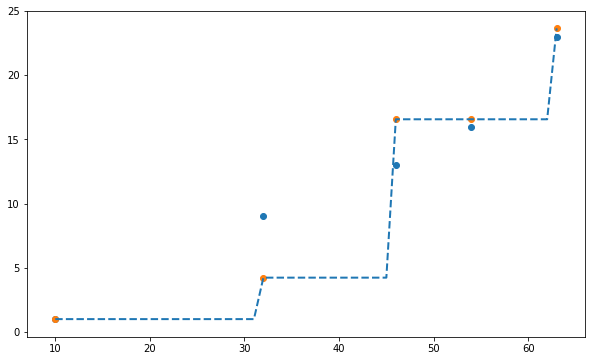

In [121]:
x = np.array([10,32,46,54,63])
y = np.array([1, 9, 13, 16, 23])

#note that the order of F(x_i) should be corresponding to the order of x_i in the table

############ INSERT YOUR SOLUTION HERE###############
F3 = function_values[:,3]
splits = x[split_indexes]
x_range = np.arange(np.min(x), np.max(x)+1)
boosted_F_plot = plot_tree(x, F3, stumps = list(np.sort(splits)))
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(x,y, label = 'original')
ax.scatter(x, F3, label = 'predicted')
ax.plot(x_range,boosted_F_plot,'--', linewidth=2, label = 'composite function')
plt.show()

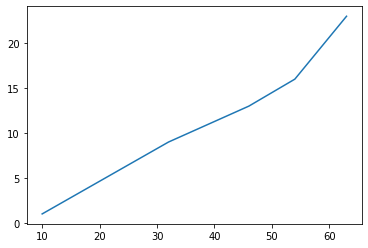

In [123]:
plt.figure()
plt.plot(data[:,0], data[:,1])
plt.show()

# Task 6. AdaBoost (1 point)

For each of the following cases,explain how AdaBoost, as given in **Lecture 7**, will treat a weak hypothesis $h_t$ with weighted error $N_t(h_t , w_t )$. Also, in each case, explain why this behavior takes place.
1. $N_t = \frac{1}{2}$
2. $N_t > \frac{1}{2}$
3. $N_t = 0$

### Your solution

$$\text {Weights of classifers in AdaBoost: } \alpha_t = \frac{1}{2}\log{\frac{1-N_t}{N_t}} \\
N_t = \frac{1}{2}: \alpha_t = \frac{1}{2}\log{1} = 0, \text{It is mean that $f_t(x)$ dont play any role in classification } \\ 
N_t \geq \frac{1}{2}: \alpha_t = \frac{1}{2}\log{b} [b\leq1] \leq 0, \text{It is mean that $f_t(x)$ play any role in classification, but it is good in misclassifications} \\ 
N_t = 0: \alpha_t = \frac{1}{2}\log{\frac{1}{0}} \to \inf, \text{It is mean that $f_t(x)$ is 'perfect' classifier, but in practice we can't get $N_t=0$}
$$